In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

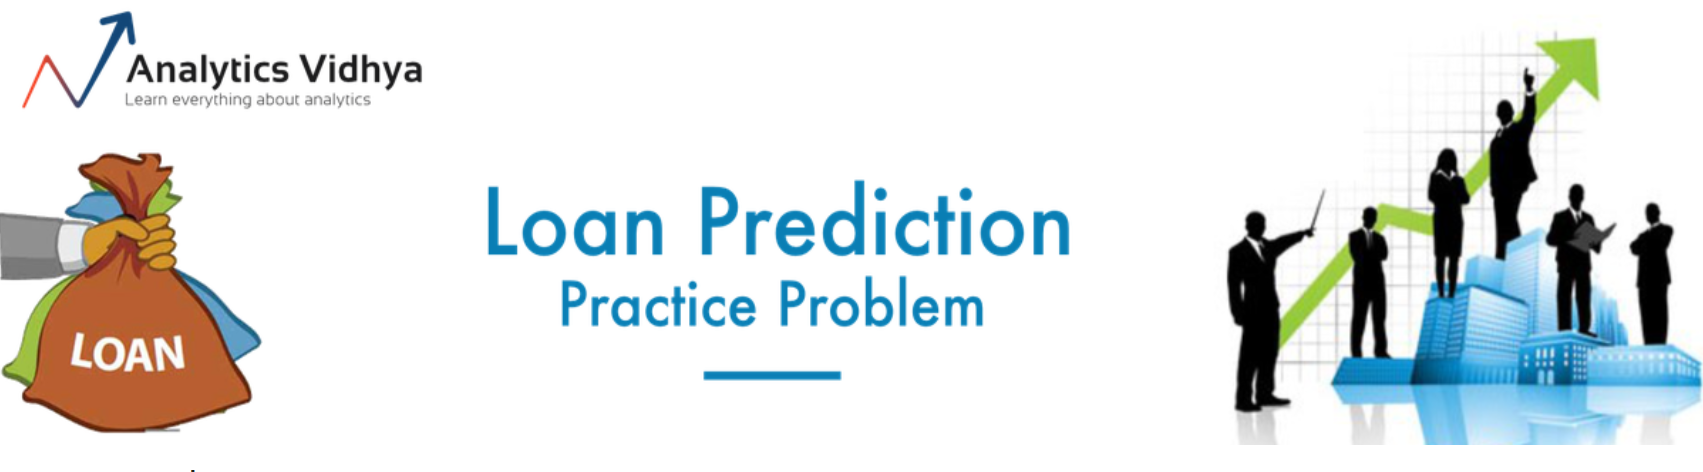

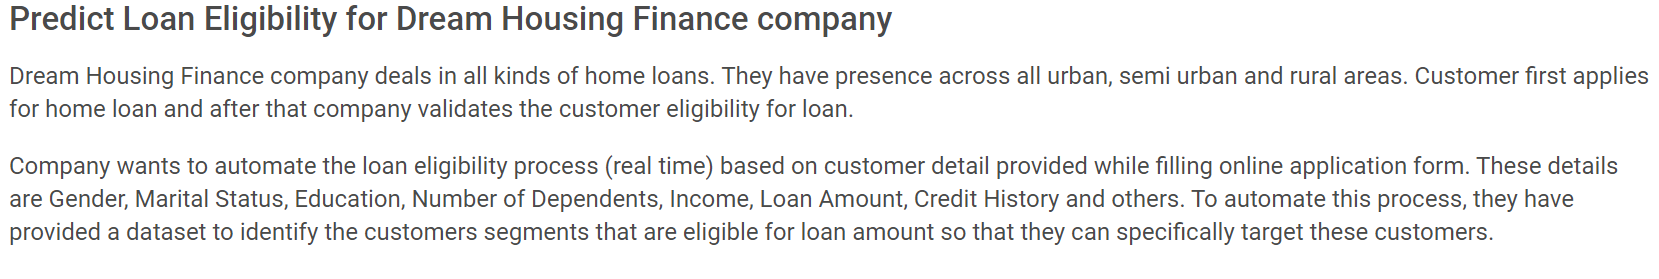

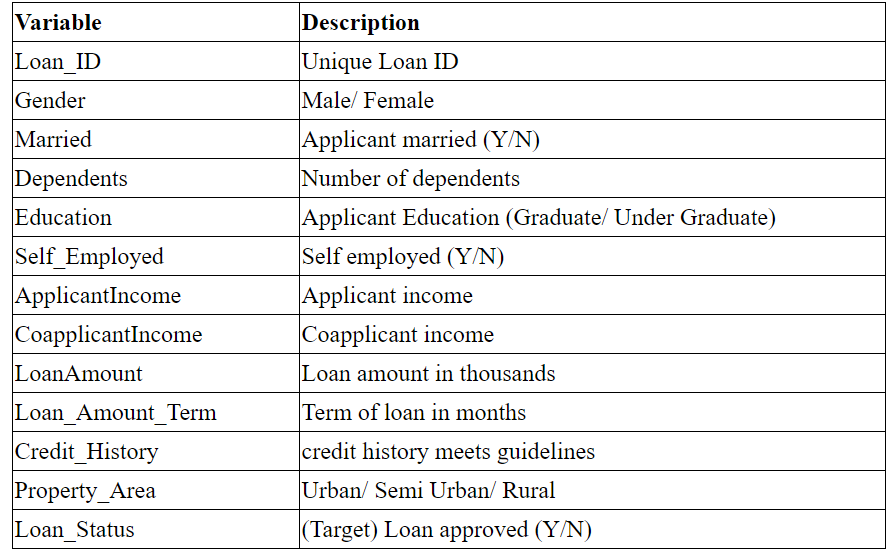

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv('../input/bank-loan2/madfhantr.csv')
test = pd.read_csv('../input/bank-loan2/madhante.csv')
train


In [ ]:
test

In [ ]:
train.describe()

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(train.isnull())

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(test.isnull())

# Exploratory Data Anaysis

1. Handling the missing values.

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

We will replace the missing values of each of the the categorical columns with its most frequent class.

In [ ]:
def impute_nan(variable,df):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)
       
    

    

In [ ]:
train_missing_categorical = ['Gender','Married','Dependents','Self_Employed','Credit_History']
for variable in train_missing_categorical:
    impute_nan(variable,train)

In [ ]:
test_missing_categorical = ['Gender','Dependents','Self_Employed','Credit_History']
for variable in test_missing_categorical:
    impute_nan(variable,test)

For the continuos data column, lets replace the null values with respective Median assuming that the null data in both the columns - Loan Amount and Loan Amount term is MCAR(missing completly at random) since the company may have lost this data or maybe while typing out, there may have been unintended omition.

In [ ]:
train_cont_missing = ['LoanAmount','Loan_Amount_Term']
for variable in train_cont_missing:
    train[variable].fillna(train[variable].median(),inplace=True)

In [ ]:
test_cont_missing = ['LoanAmount','Loan_Amount_Term']
for variable in test_cont_missing:
    test[variable].fillna(train[variable].median(),inplace=True)

In [ ]:
sns.heatmap(train.isnull())

In [ ]:
sns.heatmap(test.isnull())

We have eliminated all the null data!

2.Data Visualization

In [ ]:
sns.pairplot(train,palette = 'coolwarm')

In [ ]:
sns.boxplot(x='Gender',y='LoanAmount',data = train)

There is quite much difference in the loan amount taken by the males than the females. The company should introduce some schemes to increase the loan amounts opted by their female costumers.

In [ ]:
sns.boxplot(x='Gender',y='LoanAmount',hue='Married',data = train,palette = 'coolwarm')

There is a low significant increase in the loan amounts in married costumers than the unmarried once.

# Feature Engineering

One Hot Encodding

In [ ]:
gender = pd.get_dummies(train['Gender'],drop_first=True)

In [ ]:
test_gender = pd.get_dummies(test['Gender'],drop_first=True)

In [ ]:
married =pd.get_dummies(train['Married'],drop_first=True)
married.rename(columns={'Yes':'Married'},inplace=True)

In [ ]:
test_married= pd.get_dummies(test['Married'],drop_first=True)
test_married.rename(columns={'Yes':'Married'},inplace=True)

In [ ]:
credit_hist = pd.get_dummies(train['Credit_History'],drop_first=True)
credit_hist.rename(columns={1.0:'Credit_History_1'},inplace=True)

In [ ]:
test_credit_hist = pd.get_dummies(test['Credit_History'],drop_first=True)
test_credit_hist.rename(columns={1.0:'Credit_History_1'},inplace=True)

In [ ]:
dependents = pd.get_dummies(train['Dependents'],drop_first=True)

In [ ]:
test_dependents = pd.get_dummies(test['Dependents'],drop_first=True)

In [ ]:
edu = pd.get_dummies(train['Education'],drop_first=True)

In [ ]:
test_edu = pd.get_dummies(test['Education'],drop_first=True)

In [ ]:
self_emp = pd.get_dummies(train['Self_Employed'],drop_first=True)

In [ ]:
test_self_emp = pd.get_dummies(test['Self_Employed'],drop_first=True)

In [ ]:
prop_ar = pd.get_dummies(train['Property_Area'],drop_first=True)
test_prop_ar = pd.get_dummies(test['Property_Area'],drop_first=True)

In [ ]:
print(train.shape)
print('\n')
print(test.shape)

In [ ]:
train_final = pd.concat([train,gender,married,credit_hist,dependents,edu,self_emp,prop_ar],axis=1)
test_final =  pd.concat([test,test_gender,test_married,test_credit_hist,test_dependents,test_edu,test_self_emp,test_prop_ar],axis=1)

In [ ]:
train_final.columns

In [ ]:
train_final.drop(['Loan_ID','Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area'],axis=1,inplace=True)
test_final.drop(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area'],axis=1,inplace=True)

In [ ]:
train_final.head(5)

In [ ]:
test.tail()

In [ ]:
X = train_final.drop('Loan_Status',axis=1)
y = train_final['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split

# Model Training

**HyperParameter Optimization in XGBoost**

In [ ]:

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
classifier = xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X,y)

In [ ]:
random_search.best_estimator_

In [ ]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
classifier.fit(X,y)

In [ ]:

from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)
score

In [ ]:
score.mean()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
result = classifier.predict(test_final)

In [ ]:
result

In [ ]:
submission = pd.DataFrame()
submission['Loan_ID'] = test.Loan_ID

In [ ]:
submission['Loan_Status'] = result
submission.Loan_Status.value_counts()
